# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
data = pd.read_csv('loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# number of rows and columns
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# statistical measures
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# statistical measures
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001482,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [8]:
data['Dependents'] = np.where(data['Dependents']=='3+',4,data['Dependents'])
data.Dependents.value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [9]:
data['Dependents'] = pd.to_numeric(data['Dependents'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [11]:
# number of missing values in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].median(), inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].median(), inplace = True)

In [13]:
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)

In [14]:
# number of missing values in each column
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
num_val = [i for i in data.columns if data[i].dtype != 'O']
print(len(num_val))
num_val

6


['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [16]:
cat_val = [i for i in data.columns if data[i].dtype == 'O']
print(len(cat_val))
data[cat_val]

7


,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,Rural,Y
610,LP002979,Male,Yes,Graduate,No,Rural,Y
611,LP002983,Male,Yes,Graduate,No,Urban,Y
612,LP002984,Male,Yes,Graduate,No,Urban,Y


In [17]:
from sklearn.preprocessing import LabelEncoder
data1 = data[cat_val].apply(LabelEncoder().fit_transform)
data1.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,0,0,2,1
1,1,1,1,0,0,0,0
2,2,1,1,0,1,2,1
3,3,1,1,1,0,2,1
4,4,1,0,0,0,2,1


In [18]:
data.drop(['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],axis=1,inplace=True)

In [19]:
data=data.join(data1)

In [20]:
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0.0,5849,0.0,120.0,360.0,1.0,0,1,0,0,0,2,1
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,2,1,1,0,1,2,1
3,0.0,2583,2358.0,120.0,360.0,1.0,3,1,1,1,0,2,1
4,0.0,6000,0.0,141.0,360.0,1.0,4,1,0,0,0,2,1


In [21]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(data)

MinMaxScaler()

In [22]:
data = pd.DataFrame(scalar.transform(data),columns=data.columns)
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0.00,0.070489,0.000000,0.160637,0.74359,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,1.0
1,0.25,0.054830,0.036192,0.172214,0.74359,1.0,0.001631,1.0,1.0,0.0,0.0,0.0,0.0
2,0.00,0.035250,0.000000,0.082489,0.74359,1.0,0.003263,1.0,1.0,0.0,1.0,1.0,1.0
3,0.00,0.030093,0.056592,0.160637,0.74359,1.0,0.004894,1.0,1.0,1.0,0.0,1.0,1.0
4,0.00,0.072356,0.000000,0.191027,0.74359,1.0,0.006525,1.0,0.0,0.0,0.0,1.0,1.0


# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

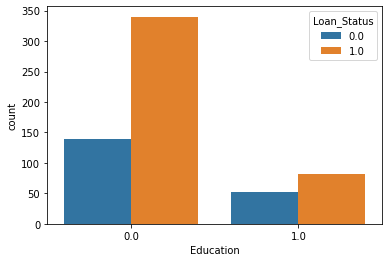

In [23]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Married', ylabel='count'>

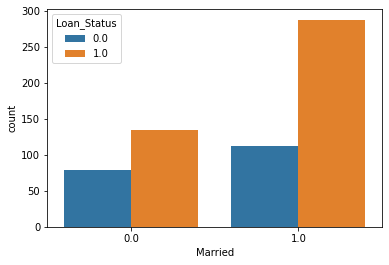

In [24]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=data)

In [25]:
# separating the data and label
X = data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = data['Loan_Status']

In [26]:
print(X)
print(Y)

     Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0          0.00         0.070489           0.000000    0.160637   
1          0.25         0.054830           0.036192    0.172214   
2          0.00         0.035250           0.000000    0.082489   
3          0.00         0.030093           0.056592    0.160637   
4          0.00         0.072356           0.000000    0.191027   
..          ...              ...                ...         ...   
609        0.00         0.034014           0.000000    0.089725   
610        1.00         0.048930           0.000000    0.044863   
611        0.25         0.097984           0.005760    0.353111   
612        0.50         0.091936           0.000000    0.257598   
613        0.00         0.054830           0.000000    0.179450   

     Loan_Amount_Term  Credit_History  Gender  Married  Education  \
0            0.743590             1.0     1.0      0.0        0.0   
1            0.743590             1.0     1.0      1.0   

Train Test Split

In [27]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


In [29]:
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0.00,0.070489,0.000000,0.160637,0.74359,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,1.0
1,0.25,0.054830,0.036192,0.172214,0.74359,1.0,0.001631,1.0,1.0,0.0,0.0,0.0,0.0
2,0.00,0.035250,0.000000,0.082489,0.74359,1.0,0.003263,1.0,1.0,0.0,1.0,1.0,1.0
3,0.00,0.030093,0.056592,0.160637,0.74359,1.0,0.004894,1.0,1.0,1.0,0.0,1.0,1.0
4,0.00,0.072356,0.000000,0.191027,0.74359,1.0,0.006525,1.0,0.0,0.0,0.0,1.0,1.0


# Training the model:

Support Vector Machine Model

In [30]:
classifier = svm.SVC(kernel='linear')

In [31]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [32]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [33]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8097826086956522


In [34]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [35]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8064516129032258


Making a predictive system